In [1]:
!pip install datasets

In [2]:
                                        import pandas as pd
                                        import seaborn as sns
                                        import nltk
                                        import matplotlib.pyplot as plt
                                        import unidecode
                                        import re
                                        import string

from sklearn.feature_extraction.text    import CountVectorizer
from nltk                               import tokenize
from string                             import punctuation
from wordcloud                          import WordCloud, STOPWORDS
from datasets                           import load_dataset

# Loading Data

In [3]:
dataset = load_dataset("banking77")

Using custom data configuration default
Reusing dataset banking77 (C:\Users\daalves\.cache\huggingface\datasets\banking77\default\1.1.0\aec0289529599d4572d76ab00c8944cb84f88410ad0c9e7da26189d31f62a55b)


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10003
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3080
    })
})

In [6]:
df =pd.DataFrame.from_dict(dataset['train'])

In [7]:
df.head()

,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11


## Changing Labels

In [8]:
df.label.unique()

array([11, 13, 32, 17, 34, 46, 36, 12,  4, 14, 33, 41,  1, 49, 23, 56, 47,
        8, 60, 75, 15, 66, 54, 40, 10, 61,  6, 16, 30, 74, 68, 38, 73, 62,
       29, 22,  3, 28, 44, 26, 45, 42, 52, 27, 51, 25, 48, 55, 18, 63, 70,
       67, 53, 21,  7, 64, 50, 35, 65, 71, 39, 58, 43, 72, 76, 37, 59,  5,
       20, 31, 57,  0, 19,  9,  2, 69, 24], dtype=int64)

In [9]:
list_intents = ["activate_my_card", "age_limit",   "apple_pay_or_google_pay",   "atm_support",                        "automatic_top_up",                        "balance_not_updated_after_bank_transfer",
                        "balance_not_updated_after_cheque_or_cash_deposit",                        "beneficiary_not_allowed",                        "cancel_transfer",
                        "card_about_to_expire",                        "card_acceptance",                        "card_arrival",
                        "card_delivery_estimate",                        "card_linking",                        "card_not_working",                        "card_payment_fee_charged",
                        "card_payment_not_recognised",                        "card_payment_wrong_exchange_rate",                        "card_swallowed",                        "cash_withdrawal_charge",
                        "cash_withdrawal_not_recognised",                        "change_pin",                        "compromised_card",                        "contactless_not_working",
                        "country_support",                        "declined_card_payment",                        "declined_cash_withdrawal",                        "declined_transfer",
                        "direct_debit_payment_not_recognised",                        "disposable_card_limits",                        "edit_personal_details",                        "exchange_charge",
                        "exchange_rate",                        "exchange_via_app",                        "extra_charge_on_statement",                        "failed_transfer",
                        "fiat_currency_support",                        "get_disposable_virtual_card",                        "get_physical_card",                        "getting_spare_card",
                        "getting_virtual_card",                        "lost_or_stolen_card",                        "lost_or_stolen_phone",                        "order_physical_card",
                        "passcode_forgotten",                        "pending_card_payment",                        "pending_cash_withdrawal",                        "pending_top_up",
                        "pending_transfer",                        "pin_blocked",                        "receiving_money",                        "Refund_not_showing_up",
                        "request_refund",                        "reverted_card_payment?",                        "supported_cards_and_currencies",                        "terminate_account",
                        "top_up_by_bank_transfer_charge",                        "top_up_by_card_charge",                        "top_up_by_cash_or_cheque",                        "top_up_failed",
                        "top_up_limits",                        "top_up_reverted",                        "topping_up_by_card",                        "transaction_charged_twice",
                        "transfer_fee_charged",                        "transfer_into_account",                        "transfer_not_received_by_recipient",                        "transfer_timing",
                        "unable_to_verify_identity",                        "verify_my_identity",                      "verify_source_of_funds",
                        "verify_top_up",                        "virtual_card_not_working",                        "visa_or_mastercard",                        "why_verify_identity",
                        "wrong_amount_of_cash_received",                        "wrong_exchange_rate_for_cash_withdrawal"
               ]

In [10]:
i = 0
for intent in list_intents:
    df['label'].replace(i, intent, inplace = True)
    i += 1

In [11]:
df.label.unique()

array(['card_arrival', 'card_linking', 'exchange_rate',
       'card_payment_wrong_exchange_rate', 'extra_charge_on_statement',
       'pending_cash_withdrawal', 'fiat_currency_support',
       'card_delivery_estimate', 'automatic_top_up', 'card_not_working',
       'exchange_via_app', 'lost_or_stolen_card', 'age_limit',
       'pin_blocked', 'contactless_not_working',
       'top_up_by_bank_transfer_charge', 'pending_top_up',
       'cancel_transfer', 'top_up_limits',
       'wrong_amount_of_cash_received', 'card_payment_fee_charged',
       'transfer_not_received_by_recipient',
       'supported_cards_and_currencies', 'getting_virtual_card',
       'card_acceptance', 'top_up_reverted',
       'balance_not_updated_after_cheque_or_cash_deposit',
       'card_payment_not_recognised', 'edit_personal_details',
       'why_verify_identity', 'unable_to_verify_identity',
       'get_physical_card', 'visa_or_mastercard', 'topping_up_by_card',
       'disposable_card_limits', 'compromised_card

In [12]:
df.head()

,text,label
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


# Functions

In [13]:
def print_wordcloud(data, coluna_texto):
    all_words = ' '.join([data for data in data[coluna_texto]])
    word_cloud = WordCloud(width = 1500, height = 900).generate(all_words)
    plt.rcParams['figure.figsize'] = [20,15]
    plt.figure()
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

In [14]:
def print_pareto(data, coluna_texto, quantidade):
    all_words = ' '.join([data for data in data[coluna_texto]])
    token_space = tokenize.WhitespaceTokenizer()
    token_phrase = token_space.tokenize(all_words)
    frequencia = nltk.FreqDist(token_phrase)
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                  'Frequencia': list(frequencia.values())
                                 })
    
    top15 = df_frequencia.nlargest(columns = 'Frequencia', n = quantidade)
    plt.figure(figsize = (20,15))
    ax = sns.barplot(data = top15, x = 'Palavra', y = 'Frequencia', color = 'orange')
    ax.set(ylabel = 'Contagem')
    plt.show()
    return top15

# Cleaning the Data

## Removing Punctuation

In [15]:
df['text_filtered']=df['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [16]:
df.head()

,text,label,text_filtered
0,I am still waiting on my card?,card_arrival,I am still waiting on my card
1,What can I do if my card still hasn't arrived ...,card_arrival,What can I do if my card still hasnt arrived a...
2,I have been waiting over a week. Is the card s...,card_arrival,I have been waiting over a week Is the card st...
3,Can I track my card while it is in the process...,card_arrival,Can I track my card while it is in the process...
4,"How do I know if I will get my card, or if it ...",card_arrival,How do I know if I will get my card or if it i...


## Removing Digits

In [17]:
df['text_filtered']=df['text_filtered'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [18]:
df.head()

,text,label,text_filtered
0,I am still waiting on my card?,card_arrival,I am still waiting on my card
1,What can I do if my card still hasn't arrived ...,card_arrival,What can I do if my card still hasnt arrived a...
2,I have been waiting over a week. Is the card s...,card_arrival,I have been waiting over a week Is the card st...
3,Can I track my card while it is in the process...,card_arrival,Can I track my card while it is in the process...
4,"How do I know if I will get my card, or if it ...",card_arrival,How do I know if I will get my card or if it i...


## Lower Case

In [19]:
df['text_filtered']=df['text_filtered'].apply(lambda x: x.lower())

In [20]:
df.head()

,text,label,text_filtered
0,I am still waiting on my card?,card_arrival,i am still waiting on my card
1,What can I do if my card still hasn't arrived ...,card_arrival,what can i do if my card still hasnt arrived a...
2,I have been waiting over a week. Is the card s...,card_arrival,i have been waiting over a week is the card st...
3,Can I track my card while it is in the process...,card_arrival,can i track my card while it is in the process...
4,"How do I know if I will get my card, or if it ...",card_arrival,how do i know if i will get my card or if it i...


## Removing Stopwords

In [21]:
stop_words = nltk.corpus.stopwords.words("english")

In [22]:
frase_processada = list()
for opiniao in df.text_filtered:
    new_phrase = list()
    token_espaco = tokenize.WhitespaceTokenizer()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words:
            new_phrase.append(palavra)
    frase_processada.append(' '.join(new_phrase))
    
df['text_filtered'] = frase_processada

In [23]:
df.head()

,text,label,text_filtered
0,I am still waiting on my card?,card_arrival,still waiting card
1,What can I do if my card still hasn't arrived ...,card_arrival,card still hasnt arrived weeks
2,I have been waiting over a week. Is the card s...,card_arrival,waiting week card still coming
3,Can I track my card while it is in the process...,card_arrival,track card process delivery
4,"How do I know if I will get my card, or if it ...",card_arrival,know get card lost


# Visualizing data after cleaning

## Selecting the 3 bigger intents

In [24]:
df['label'].value_counts( normalize = True)

card_payment_fee_charged                            0.018694
direct_debit_payment_not_recognised                 0.018195
balance_not_updated_after_cheque_or_cash_deposit    0.018095
wrong_amount_of_cash_received                       0.017995
cash_withdrawal_charge                              0.017695
                                                      ...   
lost_or_stolen_card                                 0.008198
card_swallowed                                      0.006098
card_acceptance                                     0.005898
virtual_card_not_working                            0.004099
contactless_not_working                             0.003499
Name: label, Length: 77, dtype: float64

### card_payment_fee_charged

In [25]:
df1 = df[df['label'] == 'card_payment_fee_charged']

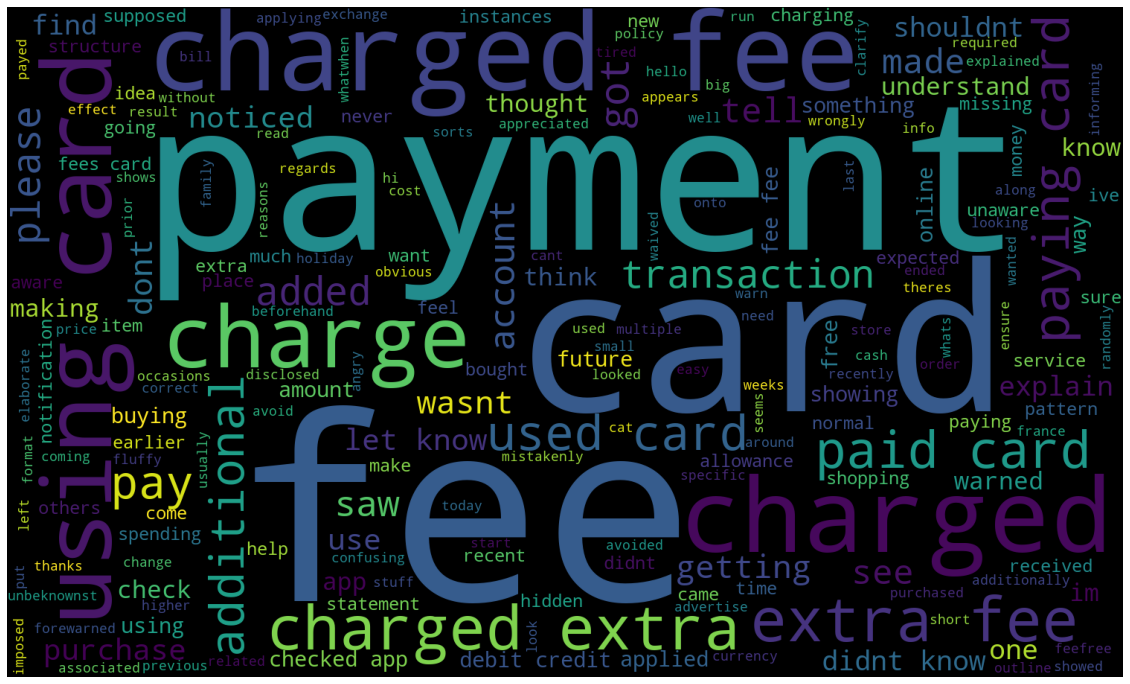

In [26]:
print_wordcloud(df1, 'text_filtered')

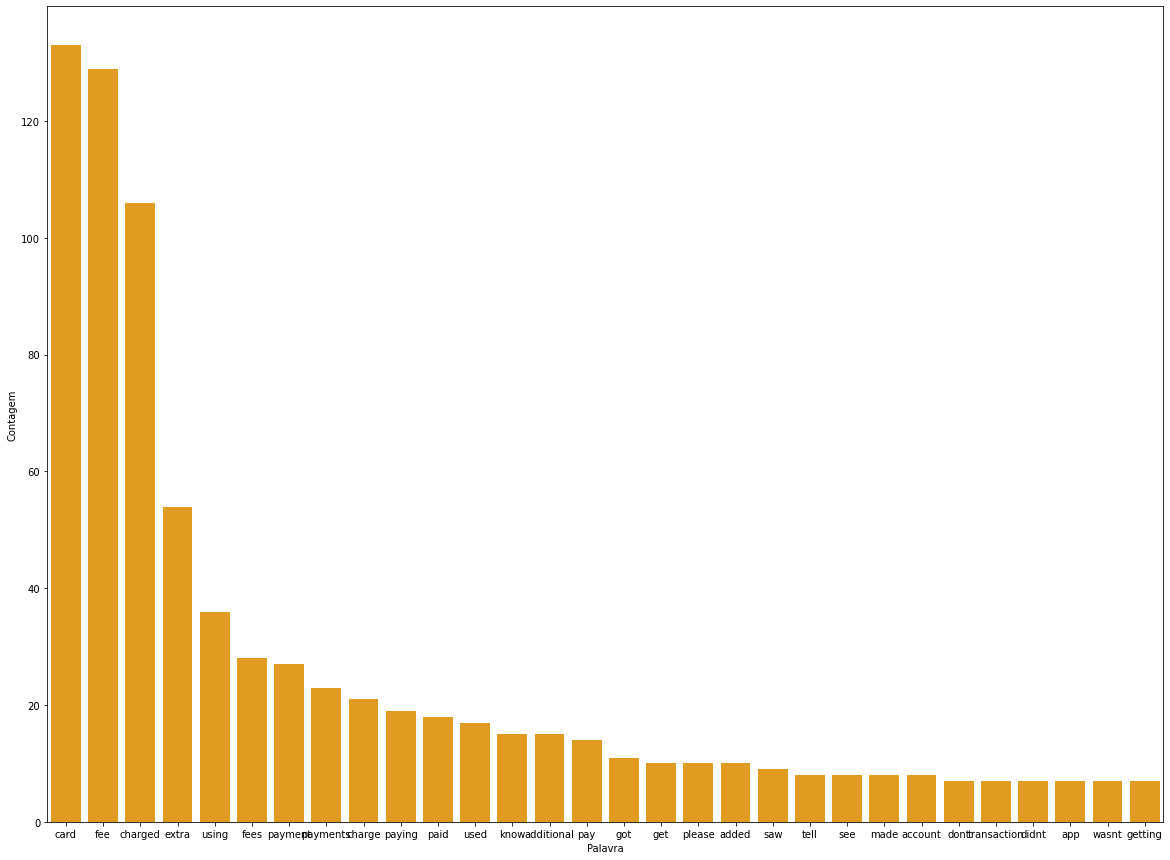

In [27]:
imprimir = print_pareto(df1, 'text_filtered', 30)

### direct_debit_payment_not_recognised

In [28]:
df1 = df[df['label'] == 'direct_debit_payment_not_recognised']

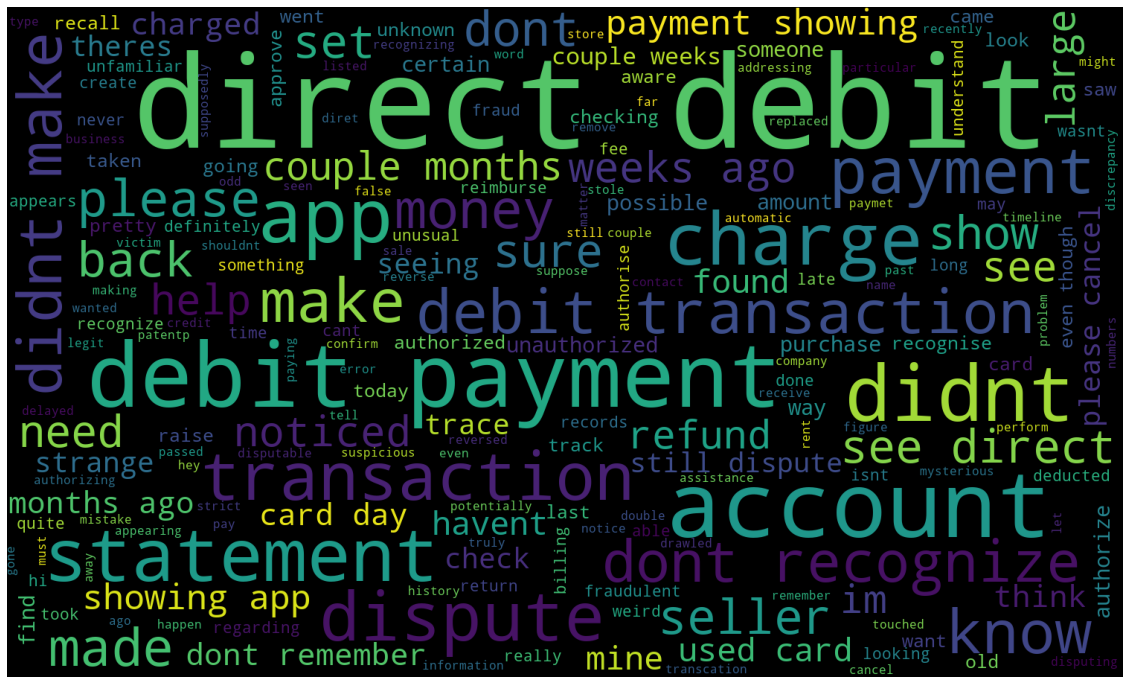

In [29]:
print_wordcloud(df1, 'text_filtered')

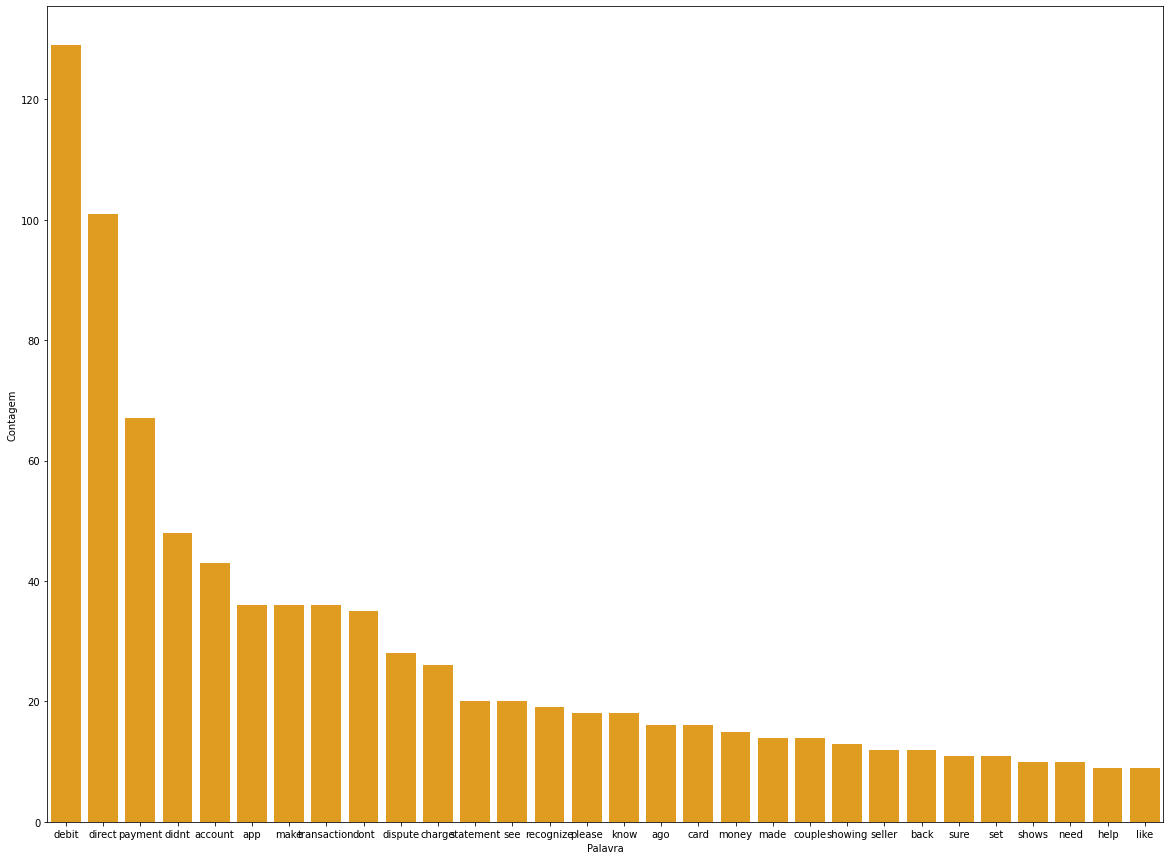

In [30]:
imprimir = print_pareto(df1, 'text_filtered', 30)

### balance_not_updated_after_cheque_or_cash_deposit

In [31]:
df1 = df[df['label'] == 'balance_not_updated_after_cheque_or_cash_deposit']

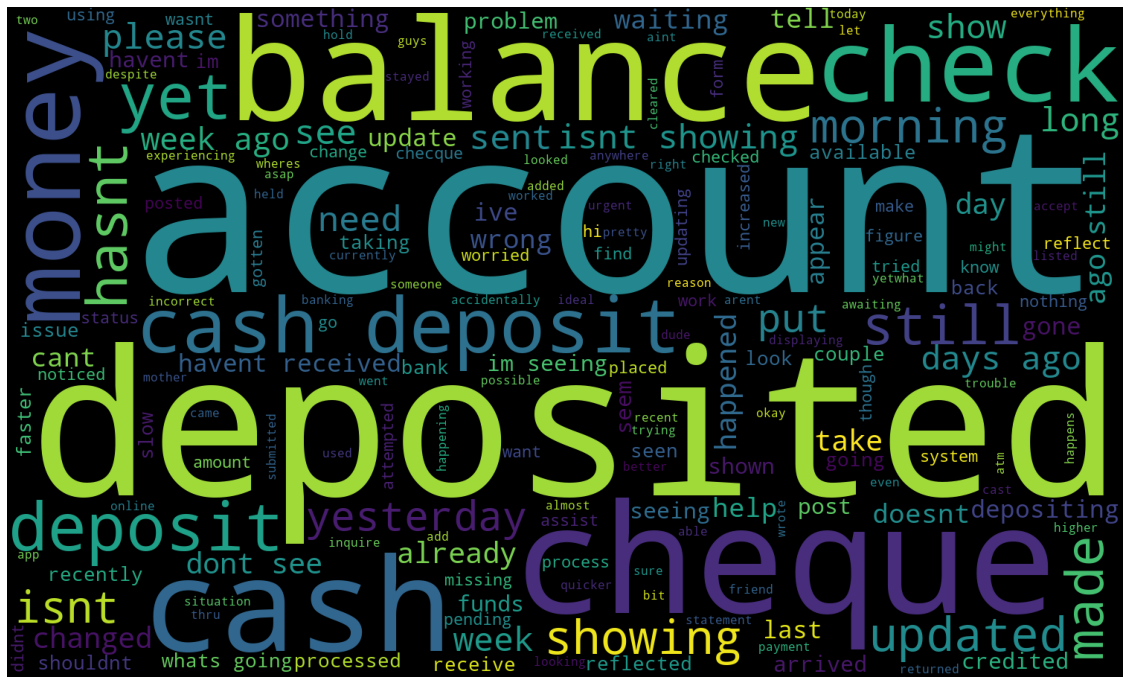

In [32]:
print_wordcloud(df1, 'text_filtered')

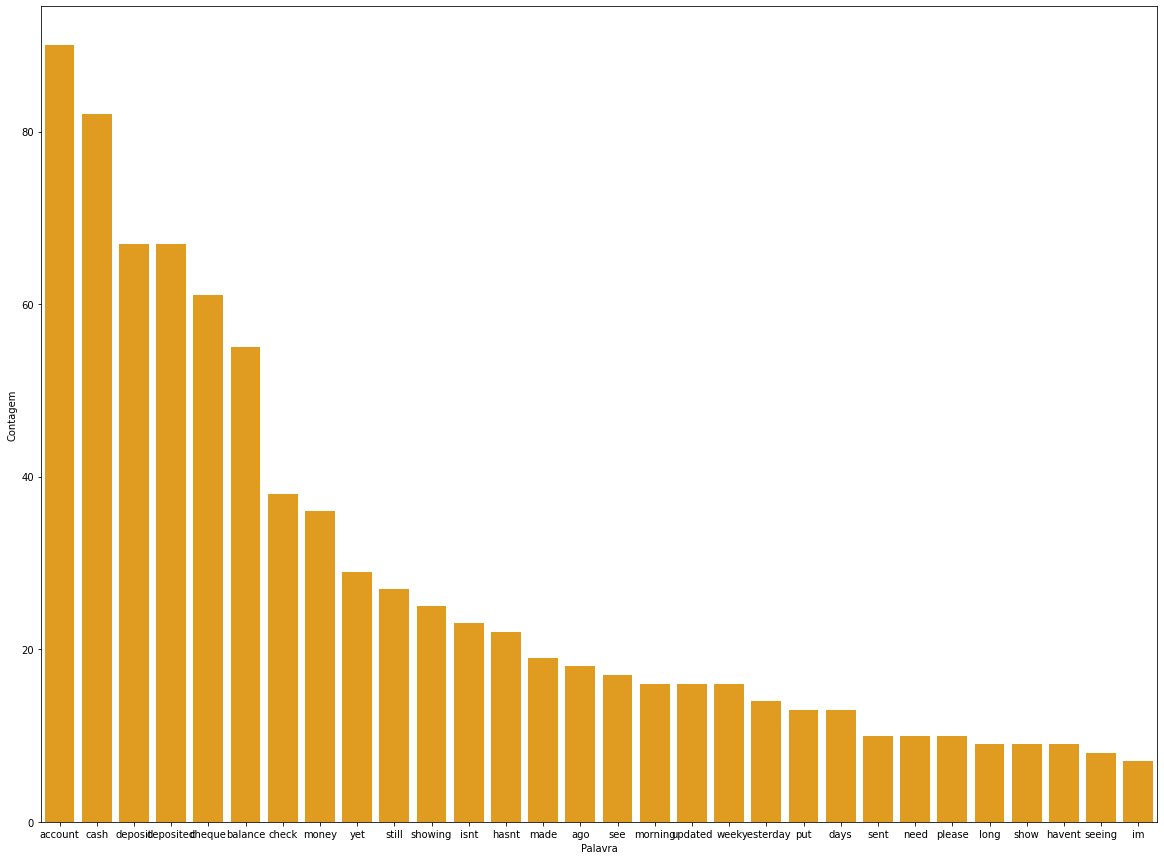

In [33]:
imprimir = print_pareto(df1, 'text_filtered', 30)

In [37]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
